<a href="https://colab.research.google.com/github/tiadwi/Data-Science-Nanodegree/blob/main/Project1-Blog-Post/Udacity_Submission_1_Diamonds_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding
Ask most people what the most robust material is, and they will probably respond with “diamond”. For centuries, diamonds have made them highly sought after due to their extraordinary beauty, durability, rarity, and stunning appearance. Diamonds are trendy, especially among people with upper-middle social status, celebrities, and royal families.

They are used for both industrial and jewelry purposes. In industry, diamonds are used as cutting tools, lasers, and (not limited to) other optical applications. Meanwhile, as jewelry, these gems are not only a symbol of love, status, and wealth but also an investment.

Unlike gold —another precious mineral on earth with a globally accepted reference price— the diamond's value is difficult to determine. Therefore, we need a system to predict the diamonds’ prices, while identifying what characteristics or features affect the most to the diamond prices.

The business questions I will try to answer in this notebook are:

* How much money do you need to buy a diamond?
* What are the most highly correlated features with diamond prices?
* How to predict the diamond price based on its features?

# Data Understanding

In this notebook, I use the Diamond dataset, a real-world dataset from ggplot2 packages to answer these questions. You can download it via the [ggplot2 GitHub repository](https://github.com/tidyverse/ggplot2/tree/master/data-raw). But before that, we need to understand the diamond features represented in the dataset.

It is common in the diamond market that the value of a diamond is determined by the 4Cs, which are:
* cut: represents the cutting quality of a diamond,
* color: represents a diamond’s grade color,
* clarity: refers to the presence of inclusions and blemishes, and
* carat: refers to its mass.

There are also other factors to consider such as shape and certification.

Unless the certification, these mentioned features are available in our dataset. Here is the explanation for shape features that consist of table, depth, x, and y:

![diamonds illustration.png](https://raw.github.com/tiadwi/Data-Science-Nanodegree/ffccebc90ae0c885d3f121c74be8e9af922b0423/Project1-Blog-Post/diamonds%20illustration.png)

In [1]:
# Import all libraries needed in this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Exploratory Data Analysis - Univariate

Exploratory data analysis or often abbreviated as EDA is an initial investigative process on data to analyze characteristics, find patterns, and anomalies, and check assumptions in the data. This technique usually uses statistical assistance and graphical representation or visualization. This technique was originally developed by an American mathematician named John Tukey in 1970. The EDA technique was then developed and is widely used in data analysis processes to date.

Univariate comes from the word "uni" which means one and "variate" which means variation. So, univariate analysis is the way we do the analysis of only one type (variation) of variables. In other words, univariate analysis is a process to explore and explain each variable in a data set separately.

In [5]:
import matplotlib.pyplot as plt

def barplot(diamonds):
    '''
    This function provide the visualization of counts of each series in a column

    Input:
    column_name

    Output:
    bar plot of value counts
    '''
    # Get the column names from the DataFrame
    columns = diamonds.columns

    # Initialize a list to store the bar plots
    plots = []

    # Iterate over each column and create a bar plot
    for column in columns:
        # Get the unique values and their counts in the column
        value_counts = diamonds[column].value_counts()

        # Create a bar plot using the value counts
        plt.figure()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Plot of {column}')

        # Add the current plot to the list
        plots.append(plt)

    # Return the list of bar plots
    return plots

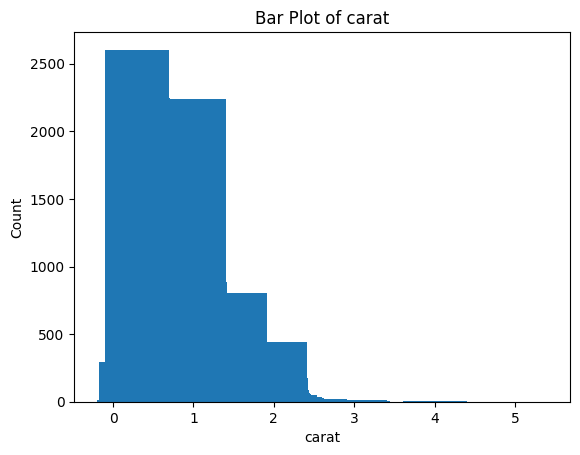

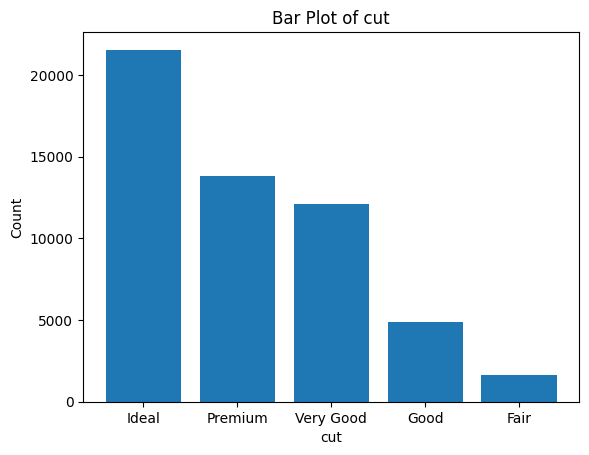

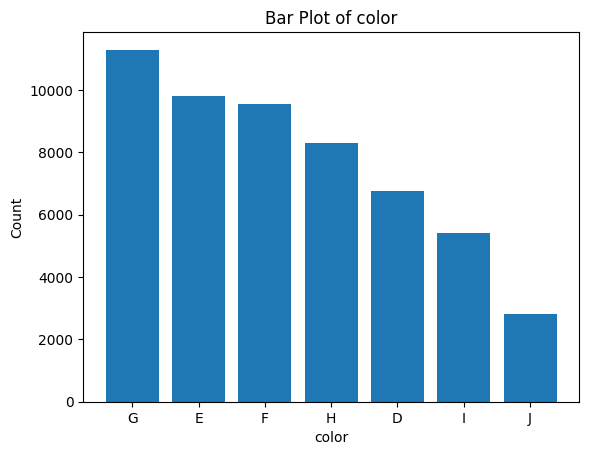

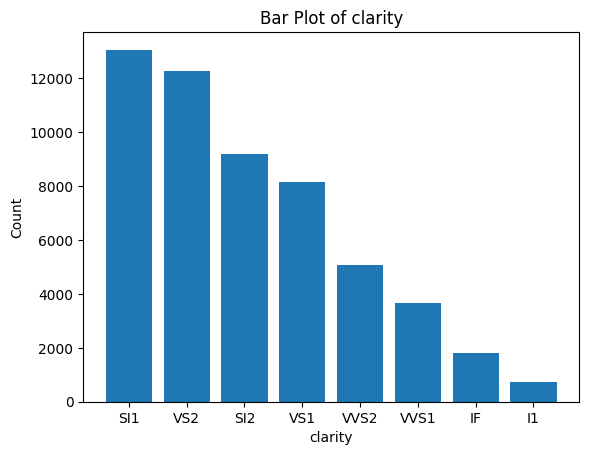

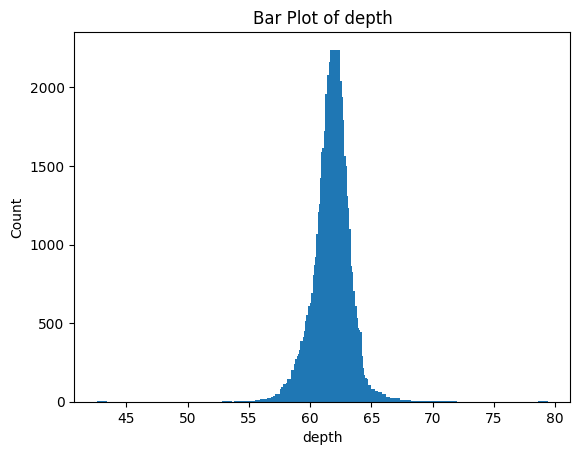

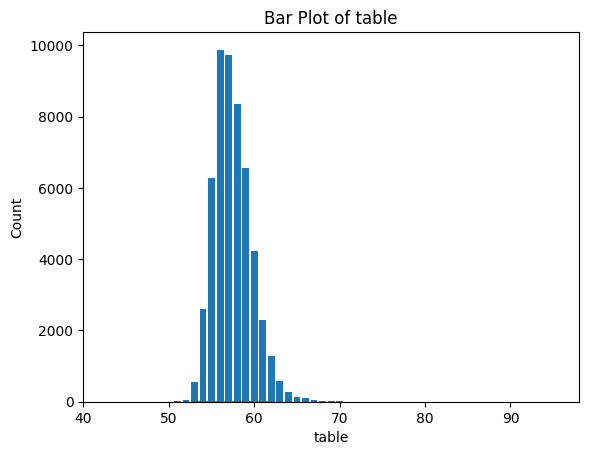

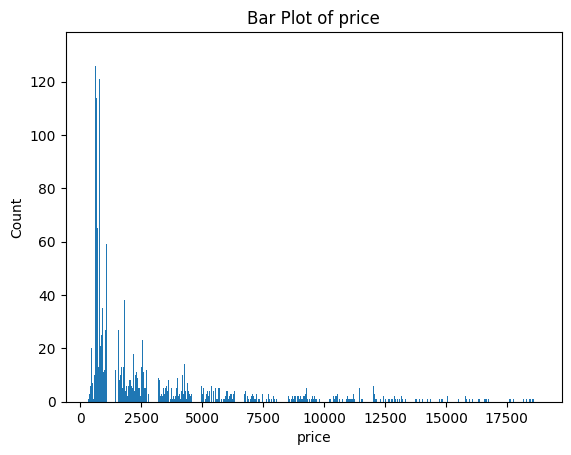

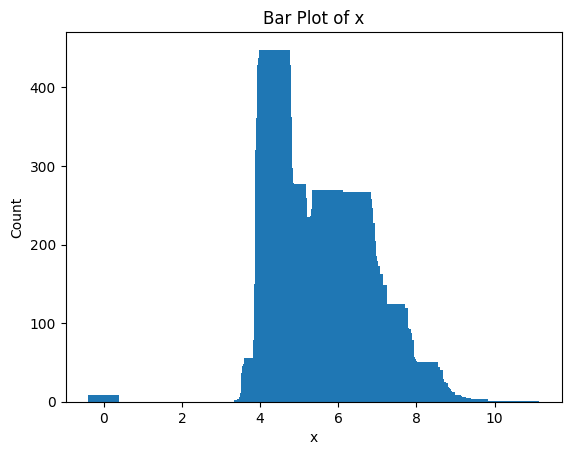

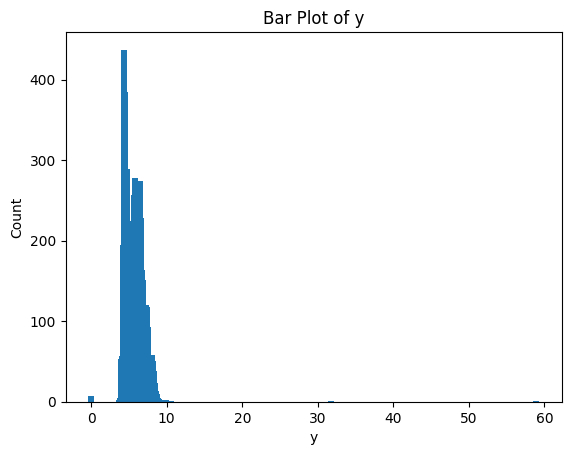

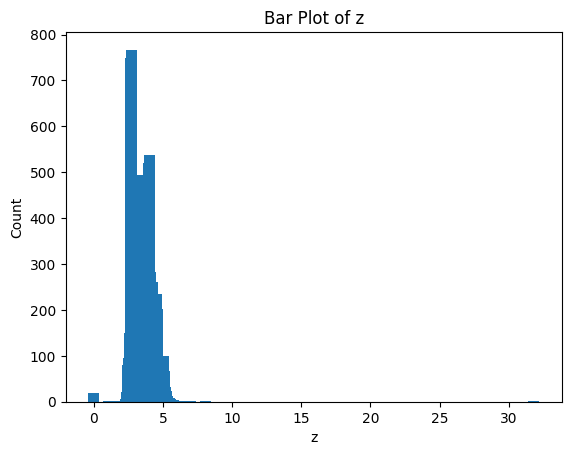

In [6]:
# Call the bar plots
plots = barplot(diamonds)

# Display the barplot
for plot in plots:
  plot.show()

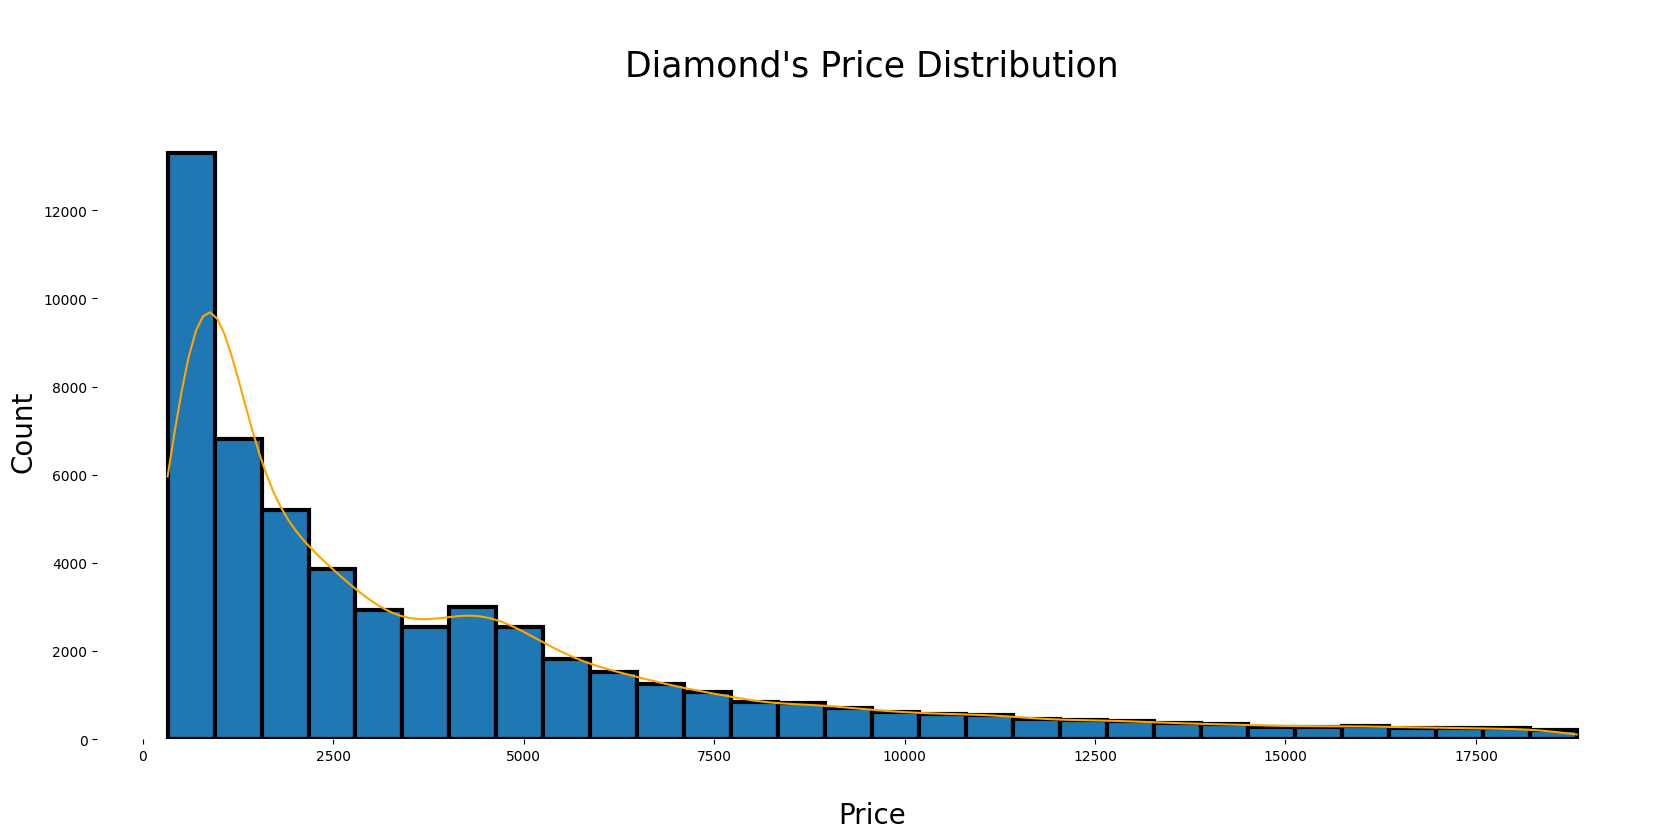

In [7]:
def visualize_diamond_price_distribution(diamonds):
    '''
    This function provide the visualization of diamond price distribution in a histogram

    Input:
    diamond['price']

    Output:
    bar plot of diamond price distribution
    '''

    # Extract the 'price' column from the DataFrame
    prices = diamonds['price']

    # Create a histogram of the diamond prices
    plt.subplots(figsize=(20, 8))
    p = sns.histplot(diamonds["price"], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=3)
    p.axes.lines[0].set_color("orange")
    p.axes.set_title("\nDiamond's Price Distribution\n",fontsize=25)
    plt.ylabel("Count",fontsize=20)
    plt.xlabel("\nPrice",fontsize=20)
    plt.yscale("linear")
    sns.despine(left=True, bottom=True)

visualize_diamond_price_distribution(diamonds)


## Exploratory Data Analyisis - Multivariate

Multivariate comes from the word "multi" which means many, and "variate" which means variation. So, multivariate analysis is the way we do an analysis of many variations of a variable. In other words, multivariate analysis is an exploratory process that involves many (two or more) variables in the data.

### Categorical Features

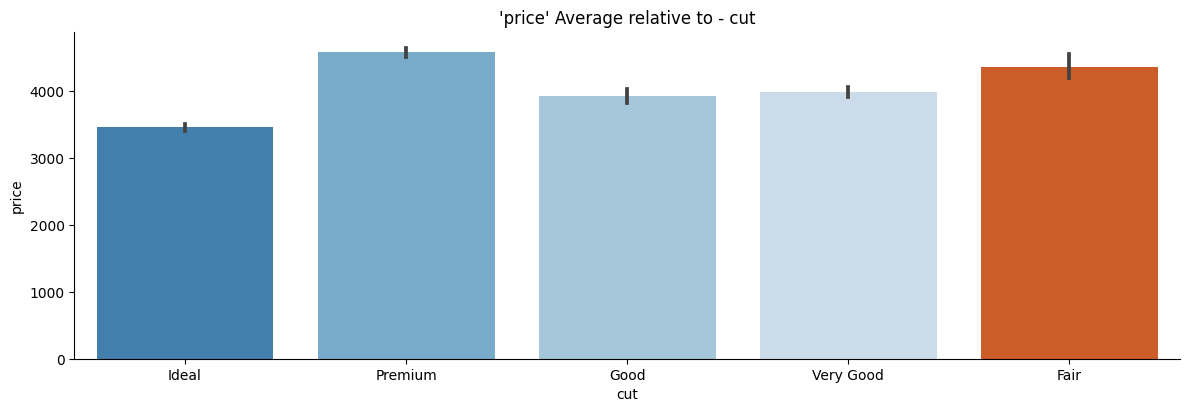

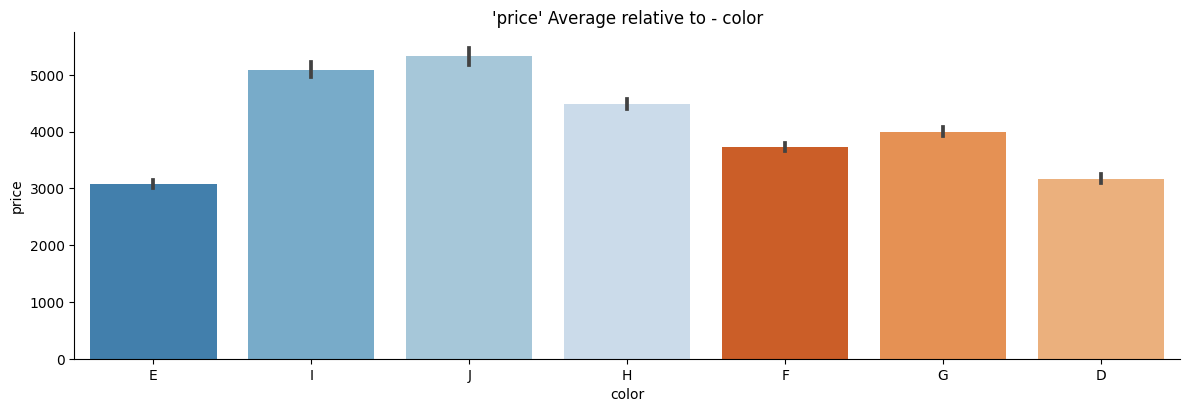

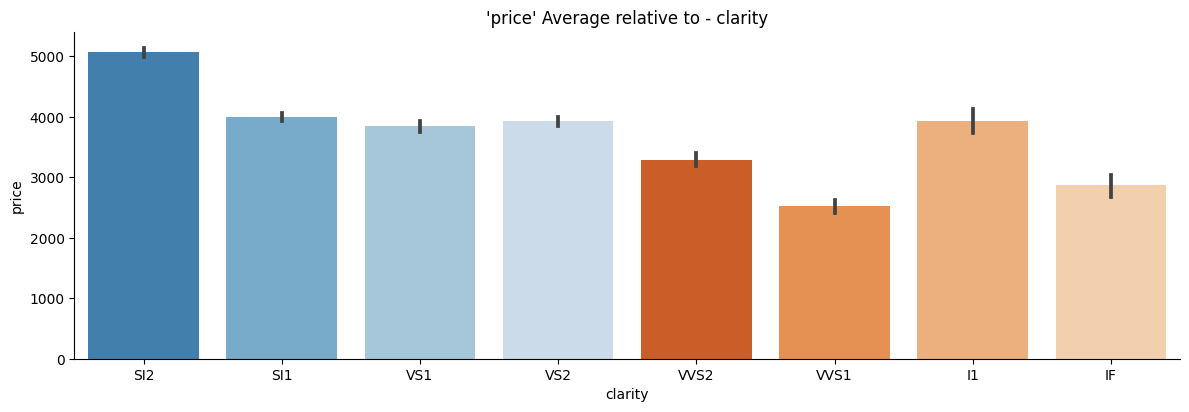

In [8]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="tab20c")
  plt.title("'price' Average relative to - {}".format(col))

### Numerical Features

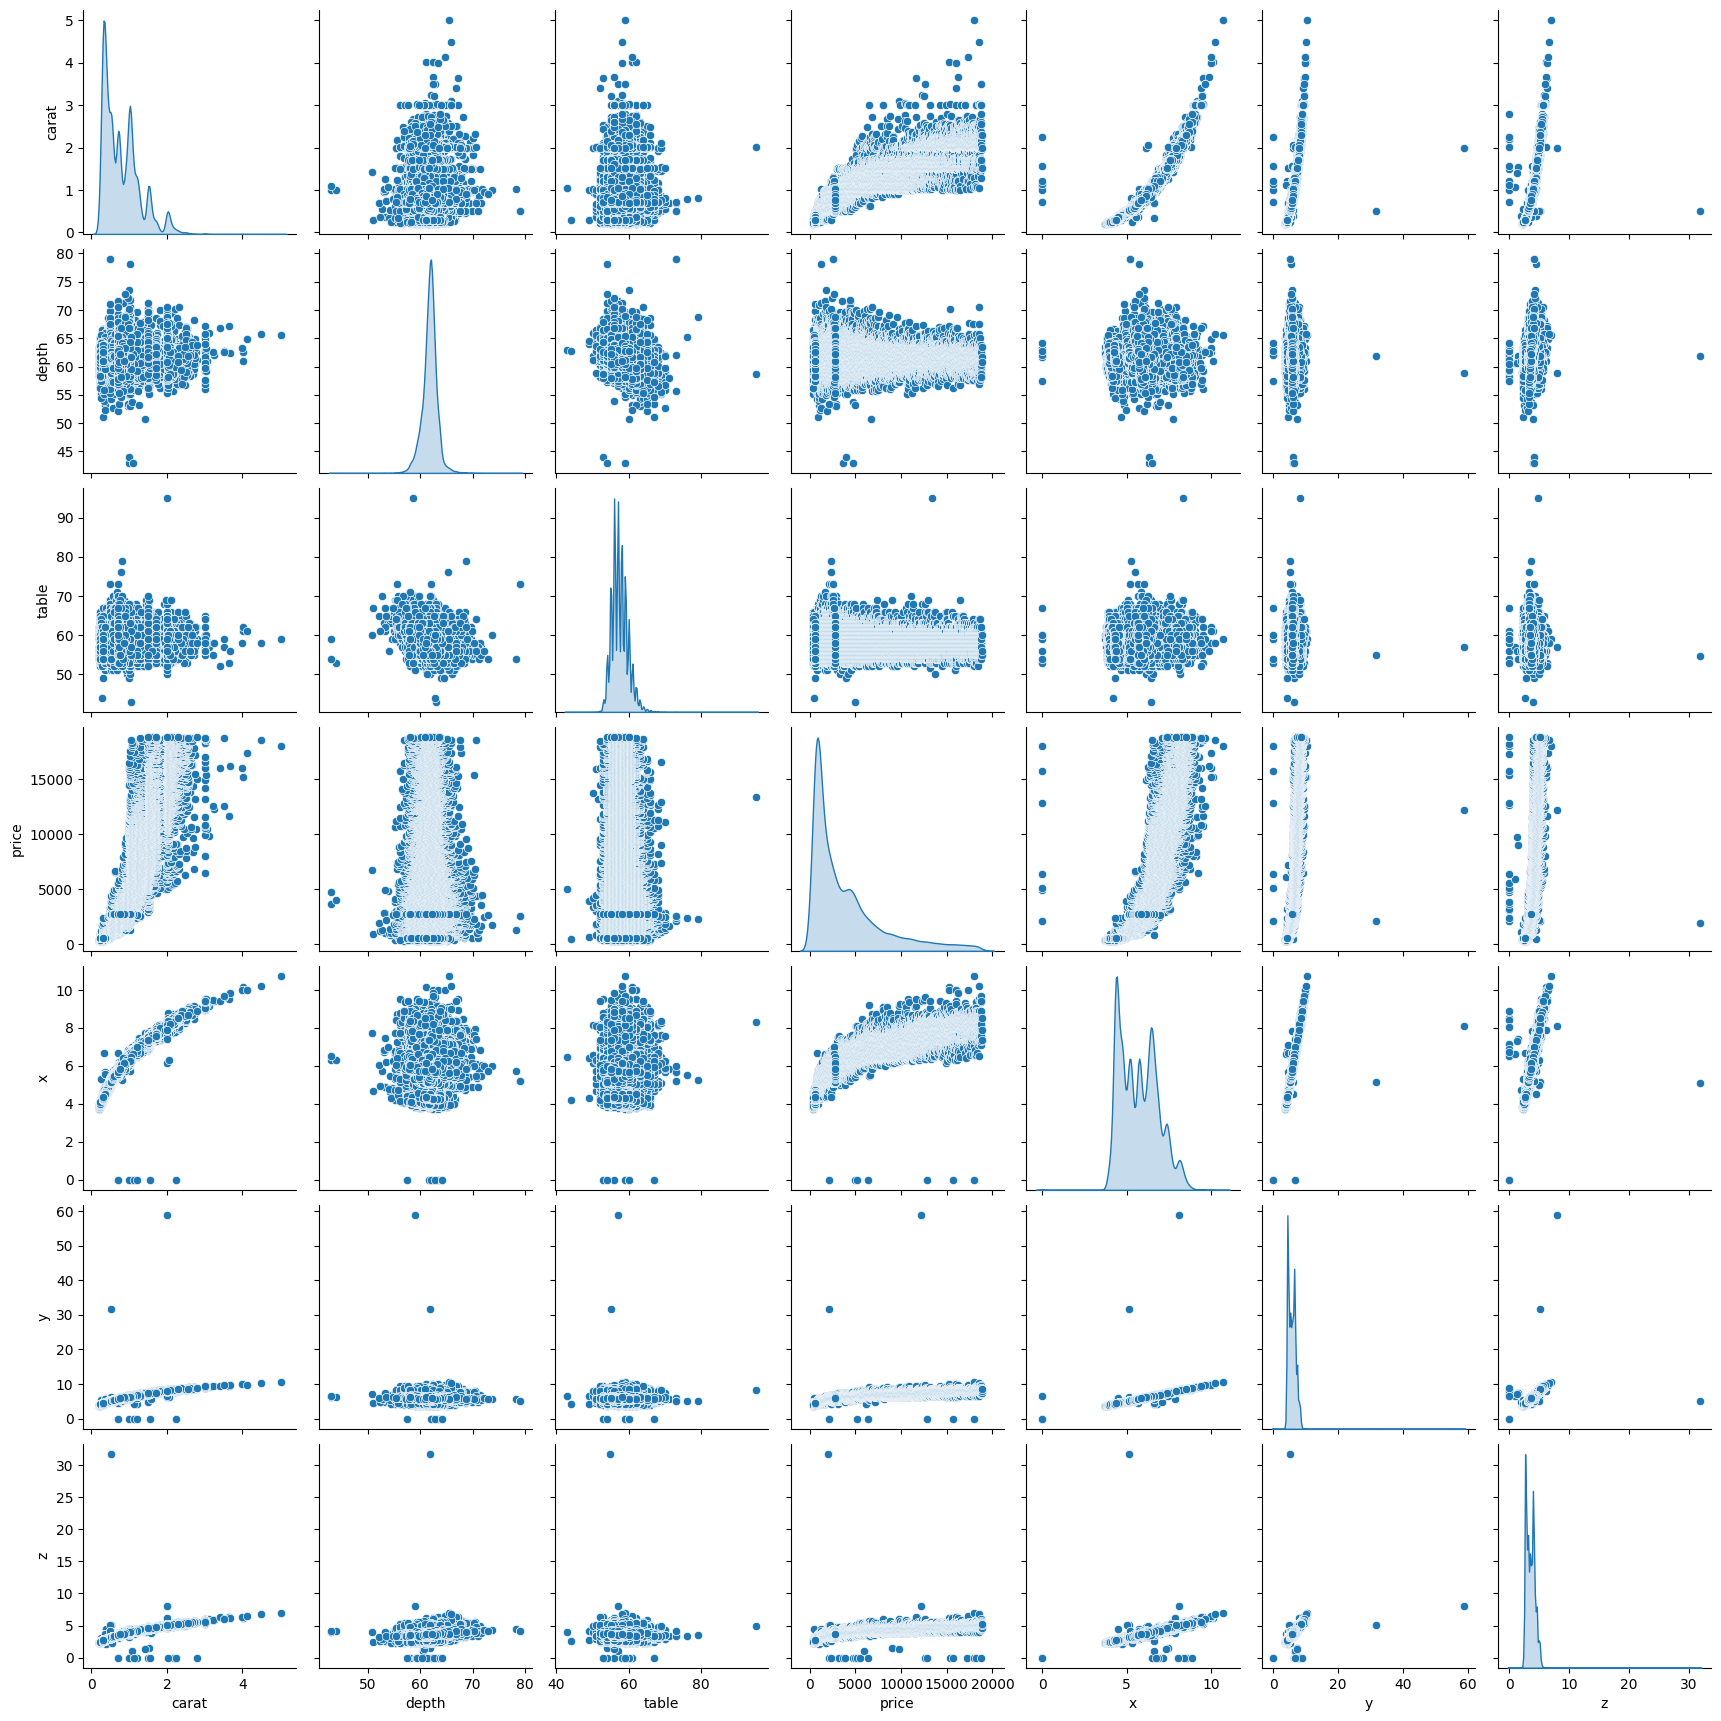

In [9]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Text(0.5, 1.0, 'Pearson Correlation on Features ')

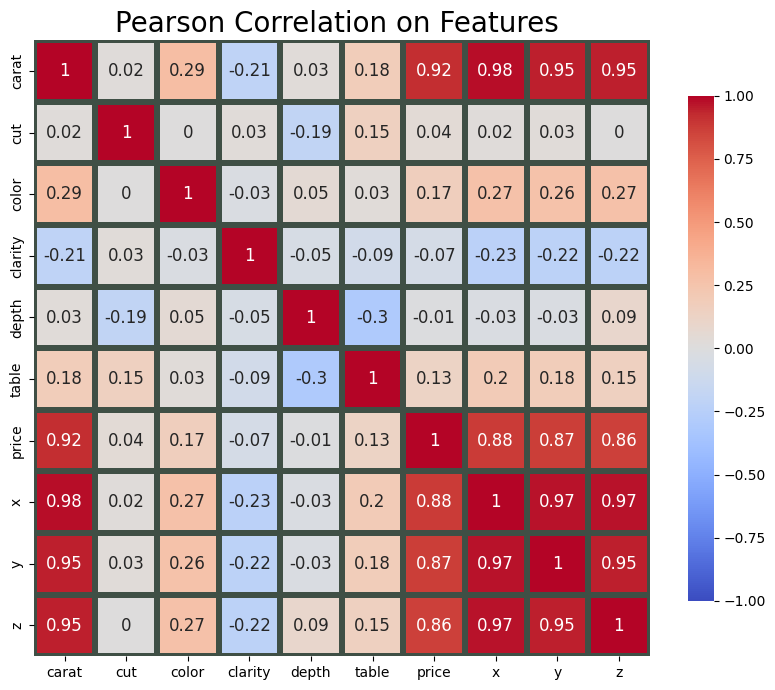

In [10]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        diamonds[col] = le.fit_transform(diamonds[col])

plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws=dict(shrink =.82), vmin=-1, vmax=1, linewidths=3,linecolor='#3f4f45',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation on Features ", size=20)

# Data Preparation
In this part, we will do some data cleaning and data preparation. Some data cleaning and Data Preparation process are:
* Handling Missing Values
* Handling Outliers
* Categorical Encoding Features
* Dimentionality Reduction with PCA
* Train-Test-Split
* Standardization


## Handling Missing Value

We found some features with null values. These features are x, y, and z, or we also call it as a diamond shape. It does not make sense that the diamond shape has zero value because the diamond has to be in three dimensions. After checking on the data, we decided to drop the missing value because the numbers of missing values are only 20 (out of almost 45K record) and we believe that it won't affect the whole dataset.



In [11]:
# Take a look at the data to check zero value
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [12]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,3,3,3,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,3,4,0,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,3,3,3,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,3,2,3,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,1,3,0,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,2,2,3,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,4,4,5,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,2,3,5,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,0,3,4,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,3,4,3,59.4,61.0,12631,8.49,8.45,0.0


In [13]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

In [14]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.553079,2.594028,3.835441,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.027705,1.701272,1.724549,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Handling Outliers
On the other hand, we handle the outliers by using [IQR methods](https://online.stat.psu.edu/stat200/lesson/3/3.2). As mentions in this [reference](https://online.stat.psu.edu/stat200/lesson/3/3.2) from Elementary Statistic course Penn State University, we can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [15]:
# Custom palette for visualization
sns.set_style("darkgrid", {"axesfacecolor": ".9"})
sns.set_context("talk", font_scale = .7)

<Axes: xlabel='carat'>

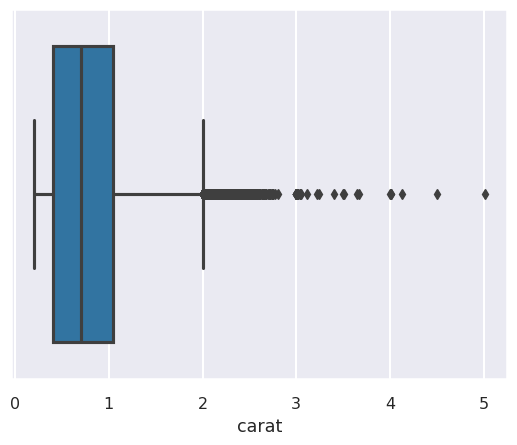

In [16]:
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

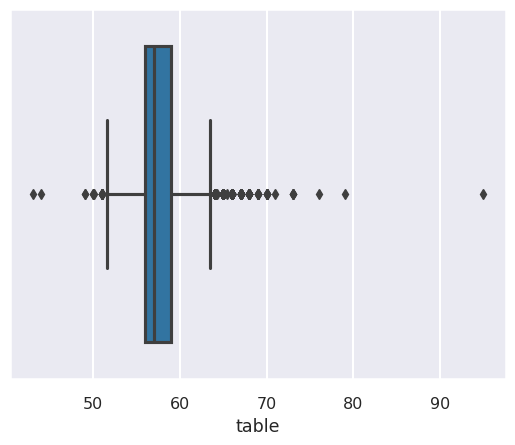

In [17]:
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

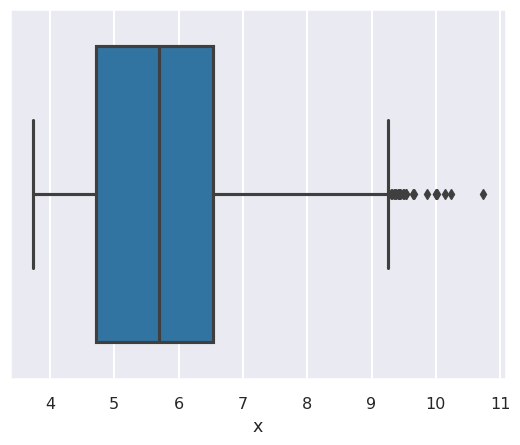

In [18]:
sns.boxplot(x=diamonds['x'])

In [19]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Check data size after we drop the outliers
diamonds.shape

(47194, 10)

## Encoding Categorical Features

To carry out the process of encoding categorical features, one of the common techniques is the one-hot-encoding technique. The scikit-learn library provides this function to get the appropriate new feature so that it can represent categorical variables. We have three categorical variables in our dataset: 'cut', 'color', and 'clarity. Let's do this encoding process with the get_dummies tool.

In [20]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_2,cut_3,cut_4,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Dimentionality Reduction with PCA
Dimensional reduction techniques are procedures that reduce the number of features while retaining information in the data. The most popular dimension reduction technique is Principal Component Analysis or PCA. It is a technique for reducing dimensions, extracting features, and transforming data from "n-dimensional space" into a new coordinate system with m dimensions, where m is smaller than n.

In our data, we have three features that we can call it as a diamond shape. We want to use PCA to reduce these three feature into one: dimension feature.

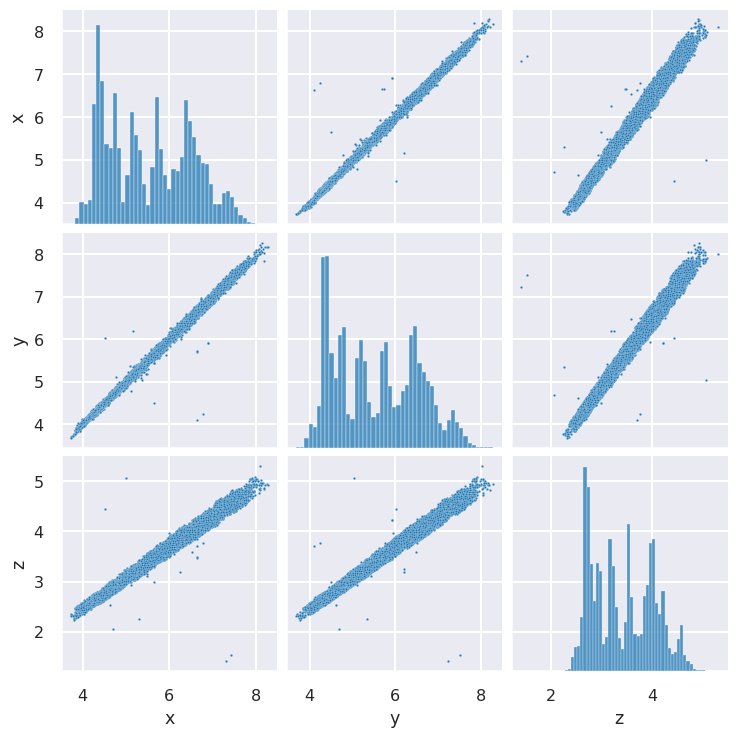

In [21]:
# plot x, y, z features using pairplot to check the each feature correlation
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [23]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)
diamonds.head()

,carat,depth,table,price,cut_2,cut_3,cut_4,color_1,color_2,color_3,...,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,dimension
0,0.23,61.5,55.0,326,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-2.447162
1,0.21,59.8,61.0,326,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-2.624632
3,0.29,62.4,58.0,334,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,-2.043120
4,0.31,63.3,58.0,335,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-1.826578
5,0.24,62.8,57.0,336,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,-2.446577


## Train-test-split
Spliting the dataset into training data (train) and test data (test) is what we have to do before we feed the data into a  machine-learning model. We need to retain some of the existing data to test how well the model generalizes to the new data.

In [25]:
# First, we need to drop the price data (our label)
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]

#Split the data using the train_test_split from sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
# Print the total sample of dataset
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47194
Total # of sample in train dataset: 37755
Total # of sample in test dataset: 9439


## Standarizasation

Machine learning algorithms have better performance and converge faster when modeled on data with relatively the same or close to normal distribution scale. The process of scaling and standardization helps to make feature data into a form that is more easily processed by algorithms.

Standardization is the most commonly used transformation technique in the modeling preparation stage. For numeric features, we will not perform transformations with one-hot-encoding as for category features. We will use the StandardScaler technique from the Scikitlearn library.

In [27]:
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
9115,0.789818,-0.627209,0.842057
33663,-0.938095,-1.122804,-0.975052
44330,-1.019091,-1.122804,-1.120463
39684,-0.830101,-0.627209,-0.837588
53265,-0.020142,1.850766,0.088962


In [28]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,37755.0000,37755.0000,37755.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3701,-2.6096,-1.8818
25%,-0.8841,-0.6272,-0.9315
50%,-0.2901,-0.1316,-0.1169
75%,0.8168,0.8596,0.8884
max,3.4897,3.0898,2.7064


# Modeling

## Model Development with KNN
Now, we will develop a machine mearning model using K-Nearest Neighbor Algorithm from Scikit-Learn Library.

In [29]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaBoost'])

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

## Model Development with Random Forest
The second algirithm we use in this notebook is Random Forest Regressor. We will also use scikit-learn library to build a machine-learning model with Random Forest Regressor.

In [31]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Model Development with AdaBoost

The third algorithm we will try to use is Adaboost. We will call AdaBoostRegressor function from Scikit-Learn library.

In [32]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation
Now, it's time to evaluate the model. Here we use Mean Squared Error to measure the accuracy. The lower the mse value, the better. At the end of this notebook, we will try to predict some diamonds price using existing data.

In [33]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [34]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','AdaBoost'])
model_dict = {'KNN': knn, 'RF': RF, 'AdaBoost': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,293.897962,379.737625
RF,57.275438,147.400911
AdaBoost,871.278082,856.240267


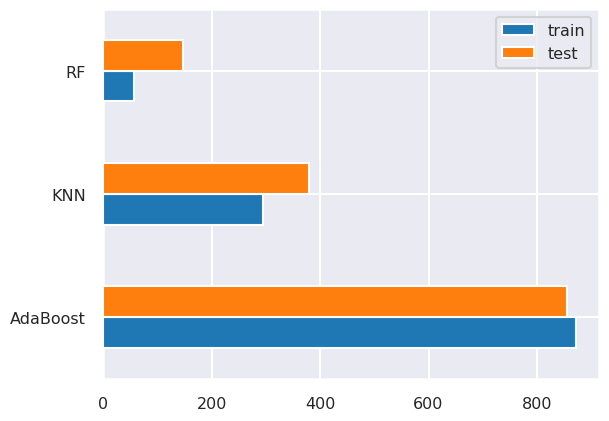

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [36]:
prediksi = X_test.iloc[3:4].copy()
pred_dict = {'y_true':y_test[3:4]}
for name, model in model_dict.items():
    pred_dict['prediction of_'+name] = model.predict(prediksi).round(2)

pd.DataFrame(pred_dict)

,y_true,prediction of_KNN,prediction of_RF,prediction of_AdaBoost
52792,2569,3103.3,2546.95,2784.35
